In [1]:
# show plots in notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_total = pd.read_csv('./bitcoin_usd.csv')
df_total['datetime'] = pd.to_datetime(df_total['date'], format='%Y-%m-%d', errors='ignore')
#df_total['date'] = df_total['date'].str
df_total.shape

(3605, 17)

In [3]:
df = df_total[3000:]

In [4]:
df = df.reset_index(drop=True)

In [5]:
df = df.set_index('date')

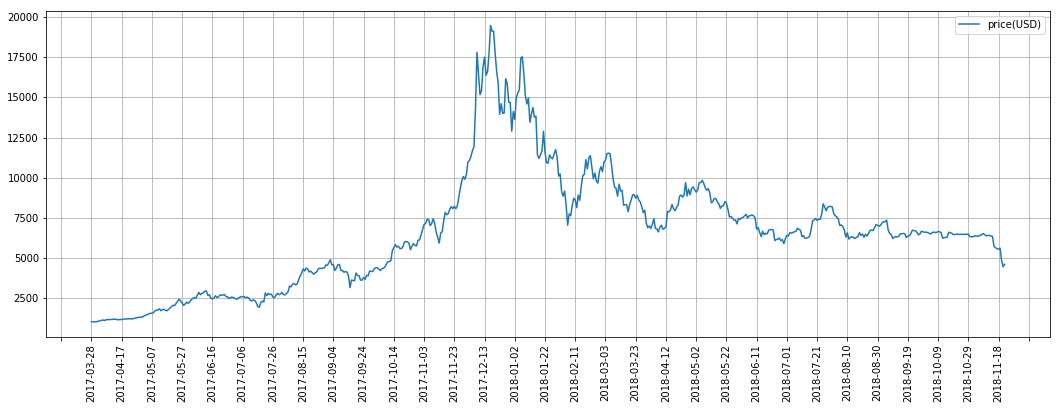

In [6]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(df.index, df['price(USD)'])
ax.xaxis.set_major_locator(plt.MaxNLocator(40))
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

In [7]:
normalized_df=(df['price(USD)']-df['price(USD)'].min())/(df['price(USD)'].max()-df['price(USD)'].min())

In [8]:
def f(x, r):
    return x + r - x**2

def f_derivate(x):
    return 1 - 2*x

In [9]:
result = []
lambdas = []
maps = []

# define range of r 
rvalues = normalized_df
xticks = np.linspace(0, 1, 4000)

# loop through r
for r in rvalues:
    x = 0.1
    result = []
    # iterate system 100 times
    for t in range(10):
        x = f(x, r)
        # calculate log of the absolute of the derivative
        try:
            log_x = np.log(abs(f_derivate(x)))
            result.append(log_x)
        except Exception as ex:
            pass
    # take average
    lambdas.append(np.mean(result))
    # for the map ignore first 100 iterations as transient time and iterate anew
    for t in range(20):
        x = f(x, r)
        maps.append(x)

print( rvalues.shape, len(maps), len(lambdas), xticks.shape )

(605,) 12100 605 (4000,)


In [10]:
maps = maps[: xticks.shape[0]]
print( rvalues.shape, len(maps), len(lambdas), xticks.shape )

(605,) 4000 605 (4000,)


C:\Users\rrick\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


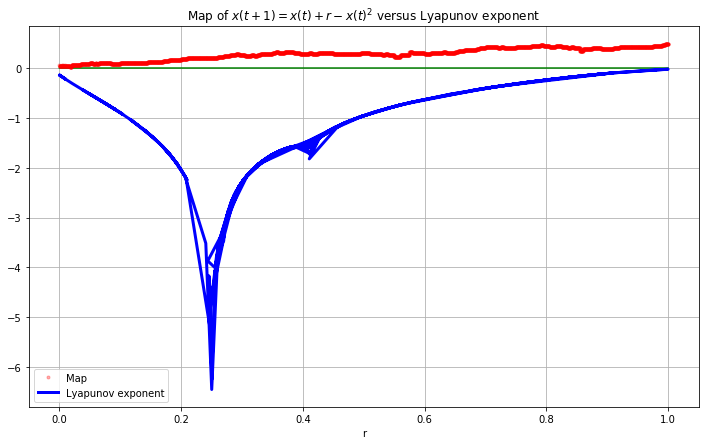

In [12]:
fig = plt.figure(figsize=(12,7))
ax2 = fig.add_subplot(1,1,1)

# zero line
zero = [0] * xticks.shape[0]
ax2.plot(xticks, zero, 'g-')
# plot map
ax2.plot(xticks, maps, 'r.',alpha = 0.3, label = 'Map')
ax2.set_xlabel('r')
# plot lyapunov
ax2.plot(rvalues, lambdas, 'b-', linewidth = 3, label = 'Lyapunov exponent')
ax2.grid('on')
ax2.set_xlabel('r')
ax2.legend(loc='best')
ax2.set_title('Map of $x(t+1) = x(t) + r - x(t)^2$ versus Lyapunov exponent')
plt.show()

In [13]:
from pynamical import logistic_map, simulate, bifurcation_plot

In [38]:
pops = simulate(model=logistic_map, num_gens=100, rate_min=0, rate_max=4, num_rates=1500, num_discard=120)
pops.head(10)

,0.0,0.00266844563042028,0.00533689126084056,0.008005336891260841,0.01067378252168112,0.0133422281521014,0.016010673782521682,0.018679119412941963,0.02134756504336224,0.02401601067378252,...,3.9759839893262177,3.9786524349566377,3.981320880587058,3.983989326217478,3.9866577718478986,3.989326217478319,3.991994663108739,3.9946631087391595,3.9973315543695795,4.0
0,0.0,3.537141e-310,4.698504e-274,6.347702e-253,6.236904e-238,2.653829e-226,8.420213e-217,9.091522e-209,8.267366e-202,1.135965e-195,...,0.531971,0.604936,0.042791,0.960325,0.843101,0.834905,0.593036,0.050936,0.046507,0.0
1,0.0,9.438670e-313,2.507540e-276,5.081550e-255,6.657136e-240,3.540800e-228,1.348133e-218,1.698216e-210,1.764881e-203,2.728135e-197,...,0.989932,0.950852,0.163073,0.151794,0.527363,0.549882,0.963445,0.193108,0.177257,0.0
2,0.0,2.518658e-315,1.338247e-278,4.067952e-257,7.105682e-242,4.724216e-230,2.158451e-220,3.172118e-212,3.767592e-205,6.551892e-199,...,0.039627,0.185931,0.543372,0.512950,0.993680,0.987405,0.140592,0.622438,0.582960,0.0
3,0.0,6.720903e-318,7.142079e-281,3.256532e-259,7.584451e-244,6.303156e-232,3.455826e-222,5.925238e-214,8.042892e-207,1.573503e-200,...,0.151313,0.602212,0.987841,0.995329,0.025038,0.049612,0.482336,0.938782,0.971822,0.0
4,0.0,1.793458e-320,3.811650e-283,2.606964e-261,8.095478e-246,8.409815e-234,5.533011e-224,1.106782e-215,1.716962e-208,3.778927e-202,...,0.510586,0.953097,0.047820,0.018521,0.097320,0.188099,0.996753,0.229576,0.109463,0.0
5,0.0,4.940656e-323,2.034236e-285,2.086962e-263,8.640937e-248,1.122057e-235,8.858723e-226,2.067372e-217,3.665295e-210,9.075475e-204,...,0.993550,0.177857,0.181283,0.072422,0.350224,0.609240,0.012919,0.706539,0.389665,0.0
6,0.0,0.000000e+00,1.085650e-287,1.670684e-265,9.223148e-250,1.497074e-237,1.418341e-227,3.861668e-219,7.824512e-212,2.179567e-205,...,0.025478,0.581775,0.590907,0.267634,0.907232,0.949725,0.050908,0.828260,0.950670,0.0
7,0.0,0.000000e+00,5.793994e-290,1.337439e-267,9.844588e-252,1.997430e-239,2.270860e-229,7.213257e-221,1.670343e-213,5.234450e-207,...,0.098719,0.968058,0.962429,0.780886,0.335526,0.190479,0.192878,0.568223,0.187462,0.0
8,0.0,0.000000e+00,3.092192e-292,1.070665e-269,1.050790e-253,2.665016e-241,3.635800e-231,1.347373e-222,3.565775e-215,1.257106e-208,...,0.353756,0.123029,0.143964,0.681673,0.888819,0.615141,0.621458,0.980073,0.608873,0.0
9,0.0,0.000000e+00,1.650269e-294,8.571031e-272,1.121590e-255,3.555726e-243,5.821160e-233,2.516774e-224,7.612062e-217,3.019068e-210,...,0.908961,0.429267,0.490651,0.864506,0.393962,0.944443,0.939108,0.078016,0.951951,0.0


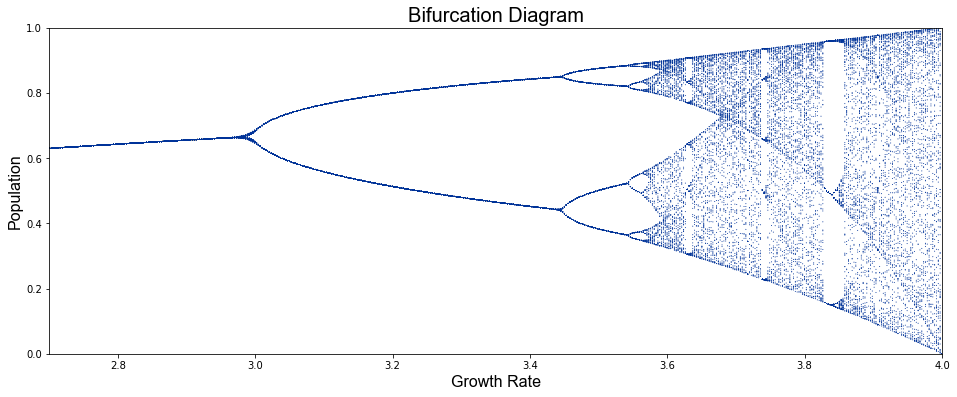

In [40]:
bifurcation_plot(pops, figsize=(16,6), xmin=2.7, xmax=4, ymin=0, ymax=1)